In [209]:
import matplotlib.pyplot as plt
import h5py
import csv
import math
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import pylab
from matplotlib.ticker import ScalarFormatter
from matplotlib import rc

dir = '/Users/maeda/Desktop/Dropbox/analysis/test-compre-exa-userhomean-13/'

itime=0
ftime=200
timejump=1
num=8
mesh=64.0**3.0
loop=500


data = np.full((ftime+1)*(num),0.0).reshape((num, (ftime+1)))#, dtype=np.int)



for i in range(itime,ftime +1,timejump): #最後は含まない
#f90 = open(dir+'All/All'+"%06.f"%(i)+'.DAT', 'rb')
#with h5py.File(dir+'NAllHDF019.h5', 'r') as f:
    with h5py.File(dir+'NAllHDF'+"%03.f"%(i)+'.h5', 'r') as f:

        RHO=f['Rho']['Rho'][()]  

        Phi1=f['Phiwv']['Phiwv1'][()] 
        Phi2=f['Phiwv']['Phiwv2'][()] 
        Phi3=f['Phiwv']['Phiwv3'][()] 
        Phi4=f['Phiwv']['Phiwv4'][()] 
        Phi5=f['Phiwv']['Phiwv5'][()] 
        Phi6=f['Phiwv']['Phiwv6'][()] 
        Phi7=f['Phiwv']['Phiwv7'][()] 
        Phi8=f['Phiwv']['Phiwv8'][()] 

        Phigrv1=f['Phigrdwv']['Phigrdwv1'][()] 
        Phigrv2=f['Phigrdwv']['Phigrdwv2'][()] 
        Phigrv3=f['Phigrdwv']['Phigrdwv3'][()] 
        Phigrv4=f['Phigrdwv']['Phigrdwv4'][()] 

        Phiexa1=f['Phiexa']['Phiexa'][()] 
        Phiexa2=f['Phiexa']['Phiexab1'][()] 
        Phiexa3=f['Phiexa']['Phiexab2'][()]
        
       
        
        data[0][i]=i*loop
        data[1][i]=np.mean(Phi1)
        data[2][i]=np.mean(Phiexa2-0.0921821)  #-0.0921821= Phideff
        data[3][i]=np.mean(Phiexa2-0.0921821-Phi1)
        data[4][i]=np.max(abs(Phiexa2-0.0921821-Phi1))
        #data[5][i]=np.sum((Phiexa2-Phi1)**2.0 / mesh)
        data[5][i]=np.mean((Phiexa2-0.0921821-Phi1)**2.0)
        data[5][i]=np.sqrt(data[5][i])
        data[6][i]=np.max(abs((Phiexa2-Phi1)/Phi1))
        data[7][i]=np.sum(abs((Phiexa2-Phi1)/Phi1)**2.0 / mesh)
        data[7][i]=np.sqrt(data[7][i])
        
        Phimax=np.max(Phiexa2)
        Phimin=np.min(Phiexa2)
        Phidff=Phimax-Phimin
        

#Phi1
#Phiexa2
#data
#Phidff
#a=-0.19769265829138177-(-0.10551051795482635) : -0.09218214033655542
#b=-0.1896843329298469-(  -0.097502194344997406)  : -0.0921821385848495

#a=-0.49546365395432629-(  -0.40328150987625122) : -0.09218214407807507
#b=-0.49515070524972771-(  -0.40296855568885803) : -0.09218214956086968

#a=0.10682719254329023-  0.19900932908058167 : -0.09218213653729143
#b=0.10675598028868269 - 0.19893811643123627 : -0.09218213614255358


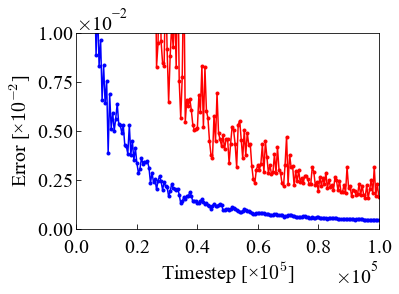

<Figure size 432x720 with 0 Axes>

In [221]:
#data_col = data.columns

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)
fig.subplots_adjust(left=0.2)
#fig=plt.figure(figsize=(6,6))

#plt.rcParams["mathtext.rm"] = "Avenir Next"
#fonts1 = ["Times New Roman","Arial","Times New Roman"]
#fonts2 = ["stix","stixsans","cm"]
plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['mathtext.default'] = 'it'
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
#plt.rcParams["xtick.minor.visible"] = True          #x軸補助目盛りの追加
#plt.rcParams["ytick.minor.visible"] = True          #y軸補助目盛りの追加
#plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
#plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
#plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
#plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 5                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 5                #y軸主目盛り線の長さ
#plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
#plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 20                       #フォントの大きさ
#plt.rcParams["axes.linewidth"] = 1.5                 #囲みの太さ
plt.xlim([0.0, 100000.0]) # x方向の描画範囲を指定
plt.ylim([0.0, 0.01]) # y方向の描画範囲を指定

#plt.figure(1)
'''
plt.plot(data[data_col[0]],data[data_col[6]],marker="o")
plt.plot(data[data_col[0]],data[data_col[7]],marker="o")
plt.plot(data[data_col[0]],data[data_col[8]]*100,marker="o")
plt.plot(data[data_col[0]],data[data_col[9]],marker="o")
'''
#plt.plot(data[data_col[0]],data[data_col[1]],marker="o")
#plt.plot(data[data_col[0]],data[data_col[2]],marker="o")
#plt.plot(data[data_col[0]],data[data_col[3]],marker="o")
#plt.plot(data[data_col[0]],data[data_col[4]],marker="o")
#plt.plot(data[data_col[0]],data[data_col[5]],marker="o")
#plt.plot(data[data_col[0]],data[data_col[6]],marker="o")
#plt.plot(data[data_col[0]],data[data_col[7]],marker="o")
#plt.plot(data[data_col[0]],data[data_col[8]],marker="o")
#plt.plot(data[0,:],data[7,:],marker="o")
plt.plot(data[0,:],data[5,:]/Phidff,marker="o", color='blue', markersize=3)
plt.plot(data[0,:],data[4,:]/Phidff,marker="o", color='red', markersize=3)

#plt.tick_params(pad =5)#, length=10, width=2, labelcolor='pink',  color='g')
#ax.xaxis.set_tick_params(direction="out", labelsize=20, width=3, pad=10)  # x軸の目盛りの調整
#ax.yaxis.set_tick_params(direction="out", labelsize=20, width=3, pad=10)  # y軸の目盛りの調整
#x.set_xlabel("Random-sampled X", fontsize=30, labelpad=20, weight='bold')  # x軸のラベルの調整
#x.set_ylabel("Random-sampled Y", fontsize=30, labelpad=20, weight='bold')  # y軸のラベルの調整
ax.xaxis.set_tick_params(pad=10)  # x軸の目盛りの調整
#ax.yaxis.set_tick_params(direction="out", labelsize=20, width=3, pad=10)  # y軸の目盛りの調整
#グラフの軸
#plt.xlabel(data[data_col[0]].name)
#plt.ylabel(data[data_col[1]].name)
#plt.ylabel(data[data_col[7]].name)
#ax.set_title('Scatter plot')
ax.set_xlabel('Timestep [×$10^5$]')
ax.set_ylabel('Error [×$10^\mathrm{{-2}}$]')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
#plt.xticks(np.arange(0, 60 + 1, 10))
#plt.yticks(np.arange(0, 20 + 1, 5))
#p = plt.plot([0.0, 60.0],[10.0, 10.0], "black", linestyle='dashed') # normal way
#p = plt.plot([0.0, 60.0],[7.6, 7.6], "red", linestyle='dashed') # normal way
#p = plt.plot([0.0, 60.0],[12.7, 12.7], "blue", linestyle='dashed') # normal way

#グラフ表示
#plt.show()
plt.figure(figsize=(6,10))

# 保存するPDFファイル名
pp = PdfPages('/Users/maeda/Desktop/err.pdf')
# 画像をPDFとして保存する
pp.savefig(fig)
# PDFの保存終了
pp.close()